<a href="https://colab.research.google.com/github/LuisAcioly/EFC1_GCC_253/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Luis Wagner Acioly Bastos

**Matricula**: 201721128

**Turma**: 10A

Link do repositório GitHub: https://github.com/LuisAcioly/EFC1_GCC_253


# Importações e Variáveis globais

In [322]:
import numpy as np
import time
import matplotlib.pyplot as plt

global_1=0

def gera_arranjos_aleatorios(n_elementos):
  A=np.random.randint(0,10, n_elementos)
  return A

def gera_arranjo_ordenado(n_elementos):
  A_ordenado = np.array(range(1, n_elementos, 1))
  return A_ordenado

def gera_arranjo_desordenado(n_elementos):
  A_desordenado = np.array(range(n_elementos, 0, -1))
  return A_desordenado


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [218]:
def insertionSort(arranjo):
  inicio=time.time()
  num_comparacoes=1
  for j in range(1, len(arranjo)):
    num_comparacoes+=1
    chave=arranjo[j]
    i=j-1
    while i >= 0 and arranjo[i] > chave:
      num_comparacoes+=1
      arranjo[i+1]= arranjo[i]
      i=i-1
    arranjo[i+1]=chave

  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes 



##  Merge Sort


In [158]:
def mergeSort(arranjo):
  inicio=time.time()
  num_comparacoes=1
  if len(arranjo) > 1:
    meio=len(arranjo) // 2
    esquerda=arranjo[:meio]
    direita=arranjo[meio:]

    mergeSort(esquerda)
    mergeSort(direita)

    i=0
    j=0
    aux=0
    num_comparacoes+=1
    
    while i < len(esquerda) and j < len(direita):
        if esquerda[i]<=direita[j]:
          arranjo[aux]=esquerda[i]
          i+=1
        else:
          arranjo[aux]=direita[j]
          j+=1
        aux+=1
        num_comparacoes+=1

    while i < len(esquerda):
      num_comparacoes+=1
      arranjo[aux]=esquerda[i]
      i+=1
      aux+=1

    while j < len(direita):
      num_comparacoes+=1
      arranjo[aux]=direita[j]
      j+=1
      aux+=1 

  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes

##  Selection Sort


In [160]:
def selectionSort(arranjo):
  inicio = time.time()
  num_comparacoes=1
  for aux in range(len(arranjo)):
    menor_indice=aux
    num_comparacoes+=1
    
    for i in range(aux + 1, len(arranjo)):
        if arranjo[i] < arranjo[menor_indice]:
          num_comparacoes+=1
          menor_indice=i
      
    (arranjo[aux], arranjo[menor_indice])=(arranjo[menor_indice], arranjo[aux])
  
  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes

##  Bubble Sort


In [320]:
def bubbleSort(arranjo):
  inicio=time.time()
  num_comparacoes=1
  alterado = True
  for i in range(len(arranjo)-1):
    if alterado:
      num_comparacoes += 1
      alterado = False
      for j in range(len(arranjo - i)-1):
        num_comparacoes += 1
        if arranjo[j] > arranjo[j+1]:
          num_comparacoes += 1
          temp = arranjo[j+1]
          arranjo[j+1] = arranjo[j]
          arranjo[j] = temp
          alterado = True

  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes

## Heap Sort

In [164]:
def max_heapify(arranjo, tam, i):
  l=2*i+1
  r=2*i+2

  if l < tam and arranjo[l] > arranjo[i]:
    maior=l
  else:
    maior=i

  if(r < tam and arranjo[r] > arranjo[maior]):
    maior=r

  if(maior != i):
    arranjo[i],arranjo[maior] = arranjo[maior],arranjo[i]
    max_heapify(arranjo, tam, maior)

def heapSort(arranjo):
  inicio=time.time()
  num_comparacoes=1
  tam=len(arranjo)

  for i in range(len(arranjo) // 2 - 1, -1, -1):
    max_heapify(arranjo, tam, i)
    num_comparacoes+=3
    
  for i in range(len(arranjo)-1, 0, -1): 
    arranjo[i], arranjo[0] = arranjo[0], arranjo[i]
    max_heapify(arranjo, i, 0)
    num_comparacoes+=3

  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes
  

## Quick Sort

> pivo = *A[A-comprimento]*

In [166]:
def particao(arranjo, inicio, fim, num_comparacoes):
  pivo=arranjo[fim]
  i=inicio-1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      num_comparacoes+=1
      i=i+1
      arranjo[i], arranjo[j]=arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), num_comparacoes

def quickSort(arranjo, inicio, fim, num_comparacoes):
  if inicio < fim:
    num_comparacoes+=1
    meio, num_comparacoes=particao(arranjo, inicio, fim, num_comparacoes)
    quickSort(arranjo,inicio,meio-1, num_comparacoes)
    quickSort(arranjo,meio+1,fim, num_comparacoes)

  return arranjo, num_comparacoes

def quickSortTotal(arranjo):
  inicio = time.time()
  num_comparacoes = 1

  arranjo, num_comparacoes = quickSort(arranjo, 0, len(arranjo)-1, num_comparacoes)
  tempo_total=time.time()-inicio
  return arranjo, tempo_total, num_comparacoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



##Funções Auxiliares

In [277]:
# Analise Assintótica
def executarAnalise(qtd_vezes, algoritmo, gerar_arranjo):
  analise_tempo = []
  analise_comparacoes = []

  for i in range(1, qtd_vezes):
    # Criação do arranjo e ordenação
    arranjo_ordenado, tempo_execucao, comparacoes = algoritmo(gerar_arranjo(qtd_vezes))
    analise_tempo.append(tempo_execucao)
    analise_comparacoes.append(comparacoes)

  return analise_tempo, analise_comparacoes

In [250]:
def obterGrafico(algoritmo, titulo):
  #Pior caso com o vetor em ordem decrescente
  pior_tempo, pior_comparacoes = executarAnalise(100, algoritmo, gera_arranjo_desordenado)

  #Melhor caso com o vetor já ordenado
  melhor_tempo, melhor_comparacoes = executarAnalise(100, algoritmo, gera_arranjo_ordenado)

  #Caso medio com o vetor com ordem aleatoria
  aleatorio_tempo, aleatorio_comparacoes = executarAnalise(100, algoritmo, gera_arranjos_aleatorios)

  # Plotagem do gráfico
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  line1 = plt.plot(pior_tempo, linewidth=2.0, label="Pior caso")
  line2 = plt.plot(melhor_tempo, linewidth=2.0, label="Melhor caso")
  line3 = plt.plot(aleatorio_tempo, linewidth=2.0, label="Caso aleatório")
  plt.title(f'Análise Assintótica - {titulo}')
  plt.ylabel('Tempo de execução')
  plt.xlabel('Quantidade de análises')
  leg = plt.legend(loc='upper left')
  plt.show()

  return (int)(np.mean(pior_comparacoes)), (int)(np.mean(melhor_comparacoes)), (int)(np.mean(aleatorio_comparacoes))

##Questão 1


###Questão 1 - A e B


####Insertion Sort


In [ ]:
p_comp, m_comp, a_comp = obterGrafico(insertionSort, "Insertion Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

####Merge Sort

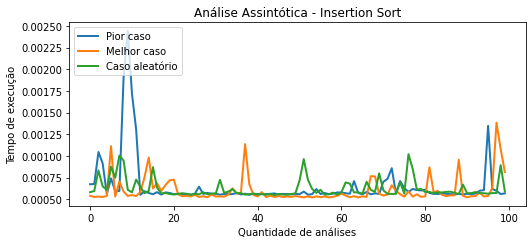

[Comparações - Média]: Pior(102) Melhor(101) Aleatório(102)


In [252]:
p_comp, m_comp, a_comp = obterGrafico(mergeSort, "Merge Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

####Selection Sort

In [ ]:
p_comp, m_comp, a_comp = obterGrafico(selectionSort, "Selection Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

####Bubble Sort

In [ ]:
p_comp, m_comp, a_comp = obterGrafico(bubbleSort, "Bubble Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

####Heap Sort

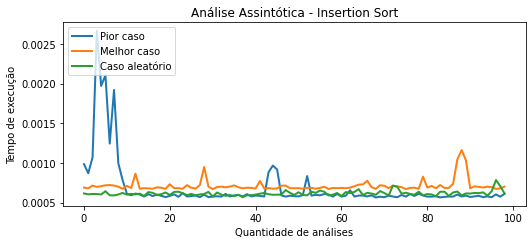

[Comparações - Média]: Pior(448) Melhor(442) Aleatório(448)


In [284]:
p_comp, m_comp, a_comp = obterGrafico(heapSort, "Heap Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

####Quick Sort

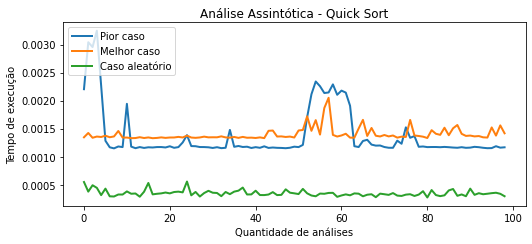

[Comparações - Média]: Pior(2) Melhor(99) Aleatório(59)


In [288]:
p_comp, m_comp, a_comp = obterGrafico(quickSortTotal, "Quick Sort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

###Questão 1 - C

Merge Sort, Heap Sort e Quick Sort terão seus piores casos com complexidade O(n log n) e nos melhoes casos Ω(n²), pois a cada ordenação realizada pelos algoritmos o arranjo é divido ao meio.

Insetion Sort e o bubble sort é O(n²) no seu pior caso e Ω(n²) no seu melhor caso pois em seu segundo loop o arranjo ira ser percorrido 2 vezes, ou seja, se n equivale ao tamanho do arranjo então ele será percorrido n * n = n². Porem no seu melhor caso ele será Ω(n).

##Questão 2

In [323]:
def partition_random(arranjo, inicio, fim, comparacoes):
  pivo_index = np.random.randint(inicio, fim)
  pivo = arranjo[pivo_index]

  i = inicio - 1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      comparacoes += 1
      i = i + 1
      arranjo[i], arranjo[j] = arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), comparacoes

def quickSort_random(arranjo, inicio, fim, comparacoes):
  if inicio < fim:
    comparacoes += 1
    meio, comparacoes = partition_random(arranjo, inicio, fim, comparacoes)
    quickSort_random(arranjo,inicio,meio-1, comparacoes)
    quickSort_random(arranjo,meio+1,fim, comparacoes)

  return arranjo, comparacoes

def quickSortAleatorio(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1

  arranjo, comparacoes = quickSort_random(arranjo, 0, len(arranjo)-1, comparacoes)
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

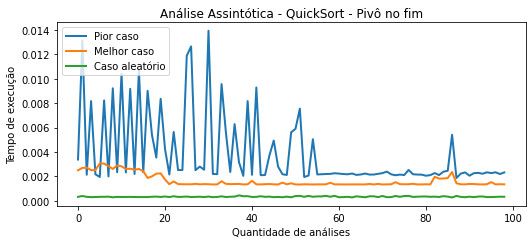

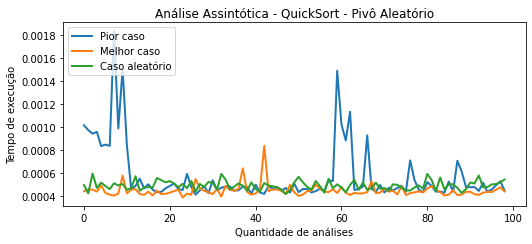

[Comparações (Pivô no fim) - Média]: Pior(2) Melhor(99) Aleatório(58)
[Comparações (Pivô no fim) - Média]: Pior(51) Melhor(52) Aleatório(54)


In [326]:
p_comp, m_comp, a_comp = obterGrafico(quickSortTotal, "QuickSort - Pivô no fim")
p_comp2, m_comp2, a_comp2 = obterGrafico(quickSortAleatorio, "QuickSort - Pivô Aleatório")
print(f"[Comparações (Pivô no fim) - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")
print(f"[Comparações (Pivô no fim) - Média]: Pior({p_comp2}) Melhor({m_comp2}) Aleatório({a_comp2})")